In [4]:
from roadrunner import roadrunner
import tellurium as te

roadrunner.Config.setValue(
    roadrunner.Config.LOADSBMLOPTIONS_CONSERVED_MOIETIES, True
)
model = te.loada("../../model/Komkova2025_antimony.txt")


In [5]:
import numpy as np

glu_e = np.linspace(0, 25, 1000)
growth = []

for i in glu_e:
    model.resetAll()
    model.GLUe = i
    model.simulate(0, 25, 1000)
    growth.append(model.Growth * 24)

model.resetAll()
model.simulate(0, 25, 1000)
ref_growth_rate = model.Growth * 24


## Fig. 5A The dependence of the specific growth rate of the GEM-embedded model as a function of the extracellular glucose concentration.

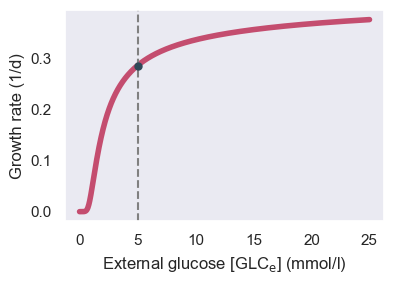

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('notebook')

plt.figure(figsize=(4.1, 3))
plt.plot(glu_e, growth, color='#C44D6F', lw=4)

plt.minorticks_on()
plt.grid(False)

plt.axvline(model.GLUe, ls='--', c='gray')
plt.plot(model.GLUe, ref_growth_rate, 'o', color='#2F4858', markersize=5)

plt.ylabel('Growth rate (1/d)')
plt.xlabel("External glucose [GLC$\mathrm{_{e}}$] (mmol/l)")
plt.tight_layout()

path = '../../out/growth_vs_GLCex.png'
plt.savefig(path, bbox_inches='tight', transparent=True, dpi=300)
plt.show()


In [7]:
import numpy as np

vmax_glut = np.linspace(0, 150, 1000)
growth = []

for i in vmax_glut:
    model.resetAll()
    model.Vf_GLUT = i
    model.simulate(0, 100, 1000)
    growth.append(model.Growth * 24)

model.resetAll()
model.simulate(0, 100, 1000)
ref_growth_rate = model.Growth * 24


## Fig.5B The dependency of the specific growth rate on the activity of the glucose transporter.

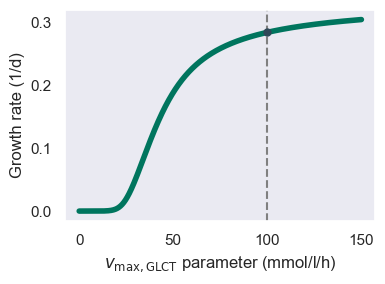

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('notebook')

plt.figure(figsize=(4.1, 3))
plt.plot(vmax_glut, growth, color='#00755E', lw=4)

plt.axvline(model.Vf_GLUT, ls='--', c='gray')
plt.plot(model.Vf_GLUT, ref_growth_rate, 'o', color='#2F4858', markersize=5)

plt.minorticks_on()
plt.grid(False)

plt.ylabel('Growth rate (1/d)')
plt.xlabel("$v_\mathrm{max,GLCT}$ parameter (mmol/l/h)")
plt.tight_layout()

path = '../../out/growth_vs_vmax_glct.png'
plt.savefig(path, bbox_inches='tight', transparent=True, dpi=300)
plt.show()
